In [1]:
import csv
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
def getAve(arr):
    return sum([int(x) for x in arr]) / len(arr)

def getListOfFiles(re, _pre = 7, _post = 4):
    return sorted(glob.glob(re), key=lambda s: int(s[_pre:-1 * _post]))

def getFirstRowOfCsv(file_name):
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        # Retun the first row
        for row in spamreader:
            return row

In [3]:
### Global Variables
y = []
err = []
fileRE = '../experiments/Exp3-aws-ganache-done/Exp3-aws3-*.csv'
# fileRE = '../experiments/Exp1-aws-ganache-done/Exp1-aws2-*.csv'
preChar = 26 + 11 + 10
postChar = 4

In [4]:
### Main Execution
for file_name in getListOfFiles(fileRE,preChar,postChar):
    row = np.asarray(getFirstRowOfCsv(file_name))
    
    print(file_name, row)

    y.append(getAve(row))
    err.append(np.std(row.astype(np.float)))

../experiments/Exp3-aws-ganache-done/Exp3-aws3-5.csv ['34' '366' '318' '421' '501' '408' '499' '554' '519' '636' '659' '533'
 '528' '506' '652' '688' '683' '1016' '707' '749']
../experiments/Exp3-aws-ganache-done/Exp3-aws3-10.csv ['39' '422' '506' '507' '369' '587' '546' '646' '496' '518' '546' '583'
 '525' '723' '697' '585' '1129' '687' '612' '527']
../experiments/Exp3-aws-ganache-done/Exp3-aws3-15.csv ['43' '529' '608' '656' '524' '698' '593' '521' '542' '614' '709' '459'
 '641' '808' '761' '742' '661' '741' '795' '664']
../experiments/Exp3-aws-ganache-done/Exp3-aws3-20.csv ['59' '1025' '833' '443' '605' '401' '698' '1030' '691' '773' '804' '608'
 '811' '601' '737' '742' '816' '800' '685' '783']
../experiments/Exp3-aws-ganache-done/Exp3-aws3-25.csv ['61' '556' '542' '734' '807' '1039' '685' '1542' '857' '763' '591' '627'
 '820' '763' '1013' '823' '793' '810' '1044' '645']
../experiments/Exp3-aws-ganache-done/Exp3-aws3-30.csv ['68' '933' '926' '810' '1791' '888' '781' '895' '769' '884

[ 548.85  562.5   615.45  697.25  775.75  888.5   851.35 1061.25  173.1
  164.9   212.4   288.9   401.2   603.15  547.85  140.95  173.45  171.8
  211.05  296.05]
[  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100]
[193.29026747355903, 192.1383616043397, 162.39780632754866, 210.70568929196003, 273.439184280527, 286.44240258732646, 209.5235726594982, 281.33589799383935, 96.40741672713774, 107.85402171453785, 91.89798692028025, 183.38154214642213, 141.83074419885133, 336.4558329112456, 171.93960422194766, 54.967695058097526, 67.66053133105001, 101.51581157632539, 162.734284955568, 208.79762331022832]


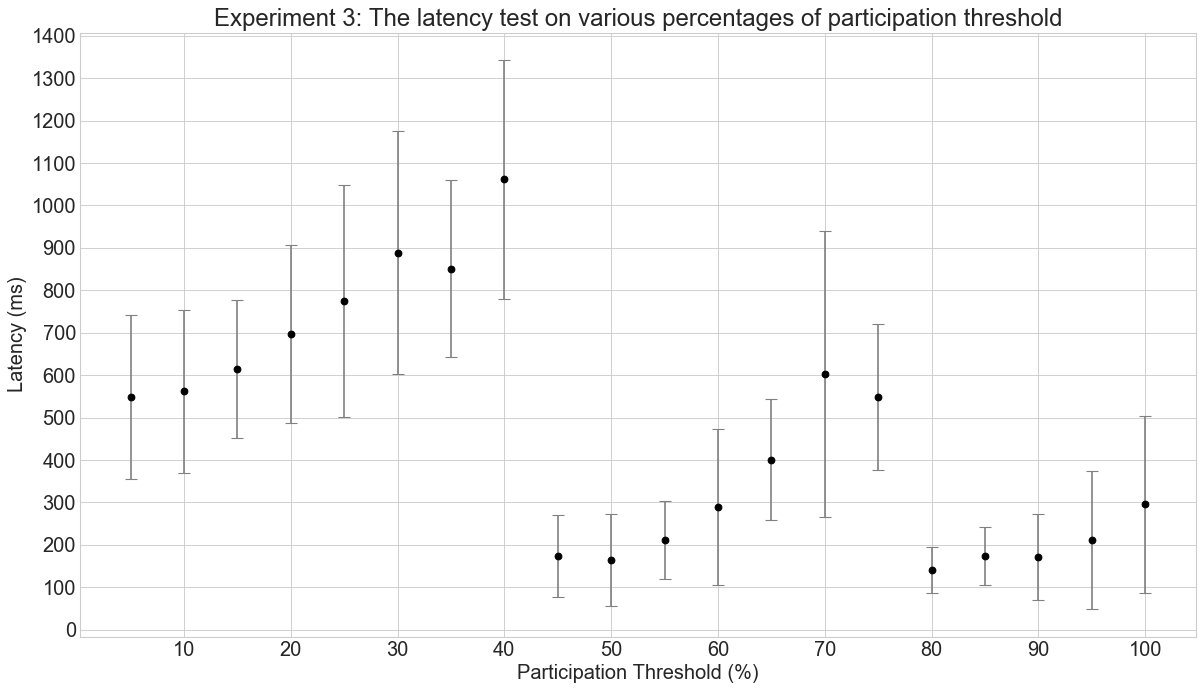

In [5]:
x = np.arange(5,101,5)
# x = np.arange(10,101,10)
y = np.asarray(y)
print(y)
print(x)
print(err)

plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})
plt.xticks(np.arange(0, 110, step=10))
plt.yticks(np.arange(0, 1500, step=100))
plt.xlabel("Participation Threshold (%)")
# plt.xlabel("Number of voters (Clients)")
plt.ylabel("Latency (ms)")
plt.title("Experiment 3: The latency test on various percentages of participation threshold")
plt.errorbar(x, y, err, fmt="ok", capsize=5, ecolor="grey");